# EE698V Assignment 1
- Use python3
- Submit your "rendered" ipynb, i.e., with outputs of codes (plots and printed values) visible below
- Do not change the return variables, as the evaluation is done by test cases based on the variables specified. Only add your code at "### WRITE YOUR CODE HERE"
- Use only numpy library for computing and signal processing, no other package allowed
- If you are using your mobile phone, you can use colab.research.google.com for coding

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# !pip install scipy     # you may need to use this in google colab
from scipy.io import wavfile

In [2]:
# No need to edit this function
def plot_discrete(x, xlabel='',ylabel=''):
    'Plot x vs n'
    from matplotlib.ticker import MaxNLocator
    ax = plt.figure().gca()
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.stem(np.arange(0,len(x)), x, use_line_collection=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return
def plot_continuous(x, Fs, xlabel='',ylabel=''):
    'Plot x vs t, using sampling rate Fs'
    Ts=1/Fs
    N = len(x)
    duration_in_s = N*Ts
    plt.plot(np.arange(0,duration_in_s,Ts), x)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return

### Generate Sawtooth signal

Generate a sawtooth wave x (rising gradually and abruptly falling) with time period = T seconds, sampling rate Fs (in Hz), and length N. Its amplitude should vary between 0 and 1 (i.e. x[0]=0 and max(x)=1).
NOTE: 
- The signal should start from zero amplitude. (i.e. rising edge should occur first)
- For your own delight make sure you plot the signal.
- Note, the discrete time period may not be integer; then the discrete signal will not be exactly periodic.

In [3]:
def generateSawtooth(T, Fs, N):
    '''
    Return: 
        x: numpy array of shape (N,)
    '''
    t=np.arange(0, N/Fs, 1/Fs)
    x=t/T-np.floor(t/T)

    ### WRITE YOUR CODE HERE - 5 MARKS

    return x

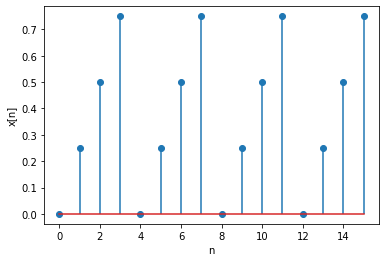

In [4]:
if __name__=="__main__": # use this line so that the following commands are not run when we import this script
    T = .4
    Fs = 10
    N = 16
    x = generateSawtooth(T, Fs, N)
    plot_discrete(x, xlabel='n', ylabel='x[n]')

### Downsampling

Downsample the signal x[n] by a factor M. M should be a positive integer; return None if M is not.

In [5]:
def downsample(x, M):
    '''
    Return:
        y: numpy array of shape similar to x, but shorter by a factor M
    '''
    if(M<=0 or float(M).is_integer()==False):
        return None
    
    y=x[0::M]

    ### WRITE YOUR CODE HERE - 5 MARKS

    return y

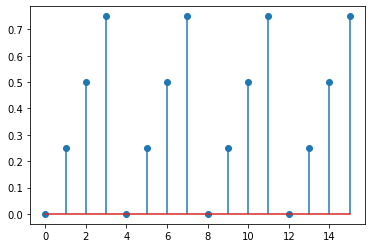

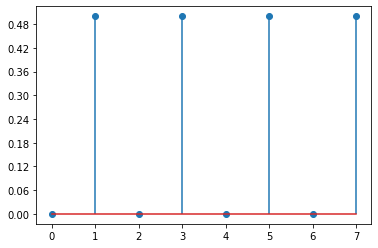

In [6]:
  if __name__=="__main__":
    M = 2
    y = downsample(x, M)
    plot_discrete(x)
    plot_discrete(y)

### Filter
If we pass a signal x[n] through a filter or a system with impulse response h[n], we get y[n].

In [7]:
def filterSig(x, h):
    '''
    Return:
        y: np array, filter output
    '''
    y=np.convolve(x, h)

    ### WRITE YOUR CODE HERE - 5 MARKS

    return y

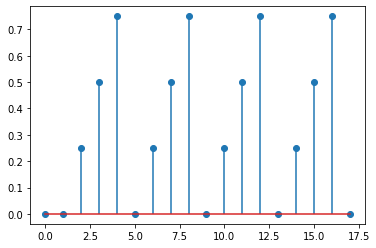

In [8]:
if __name__=="__main__":
    h = [0,1,0]
    y = filterSig(x,h)
    plot_discrete(y)

# Audio

1. Add gaussian noise and write the wave file. Listen to it how the sound has changed.
2. Filter it with a moving average filter and write the wav file. Listen to it how the sound has changed.
3. Write a function to estimate the fundamental frequency F0 around a given t in sec.


Now let's start with making functions

### Read Audio
Read audio file (use scipy library)

Note: wavefile.read reads int16. Convert it to float by dividing with 32767.

In [9]:
def readAudio(in_filename):
    '''
    Input:
        in_filename: path to the input wav file (str)
    Output:
        x: waveform, take the first channel if it has two channels (np.array 1D)
        Fs: sampling rate (int)
    '''
    Fs, x=wavfile.read(in_filename)
    x=(x/32767)
    ### WRITE YOUR CODE HERE - 5 MARKS

    return x, Fs

In [10]:
if __name__=="__main__":
    x_hari, Fs = readAudio('hari.wav')

### Write Audio
Write audio file (use scipy library).

Note: wavefile.write writes int16. Convert x from float by dividing with max(x) and multiplying with 32767, followed by type casting.

In [11]:
def writeAudio(x, Fs, out_filename):
    '''
    Input:
        x: (np.array 1D)
        Fs: sampling rate (int)
    Output:
        out_filename: path to the output wav file (str)
    '''
    x=np.int16(x/np.max(x)*32767)
    wavfile.write(out_filename, Fs, x)

    ### WRITE YOUR CODE HERE - 5 MARKS

    return


In [12]:
if __name__=="__main__":
    writeAudio(x_hari, Fs, 'x_hari.wav')

### Add Noise
Add guassian noise of specified mean and standard deviation to the signal

In [13]:
def addNoise(xn, mu, sigma):
    '''
    Input:
        xn: (np.array 1D)
        mu: mean of Gaussian noise (float)
        sigma: std dev of Gaussian noise (float)
    Output:
        yn: (np.array 1D) of same length as xn
    '''
    length=np.size(xn)
    noise=np.random.normal(mu, sigma, length)
    yn=noise+xn

    ### WRITE YOUR CODE HERE - 5 MARKS

    return yn

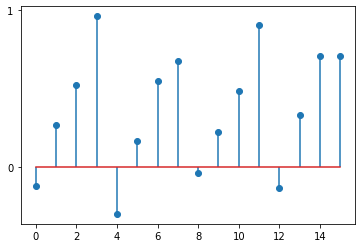

In [14]:
if __name__=="__main__":
    plot_discrete(addNoise(x, 0, 0.1))
    x_hari_noisy = addNoise(x_hari, 0, 0.1)
    writeAudio(x_hari_noisy, Fs, 'x_hari_noisy.wav')

### MA Filter
Moving average filter for removing noise  
(plot the noisy and filtered signals for comparison)

$y[n] = \frac{1}{M} \sum_{m=0}^{M-1} x[n-m]$

In [15]:
def filter_MA(x, M):
    '''
    Return:
        y: numpy array of shape similar to x
    ''' 
    t=np.ones(M)
    y=np.convolve(t, x)
    ### WRITE YOUR CODE HERE - 5 MARKS

    return y

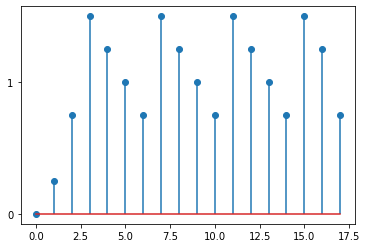

In [16]:
if __name__=="__main__":
    plot_discrete(filter_MA(x, 3))
    x_hari_filtered = filter_MA(x_hari_noisy, 20)
    writeAudio(x_hari_filtered, Fs, 'x_hari_filtered.wav')

### F0 estimation
Estimate fundamental frequency of a given signal

In [19]:
def estimateF0(x, Fs):
    '''
    Output:
        F0_Hz: (float) fundamental frequency in Hz
    '''
    b=np.correlate(x, x, "full")
    a=b[int(len(b)/2):]
    F0_Hz=1/(np.argmax(a[1:])+1)
    plot_discrete(x)
    plot_discrete(b)
    plot_discrete(a)
    F0_Hz=F0_Hz*Fs
    
    ### WRITE YOUR CODE HERE - 10 MARKS

    return F0_Hz

2.5


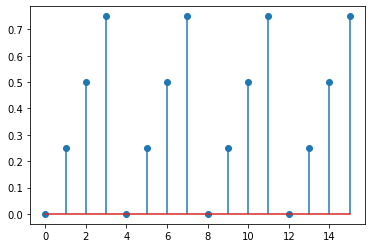

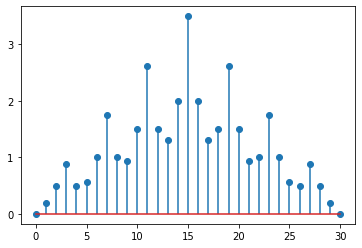

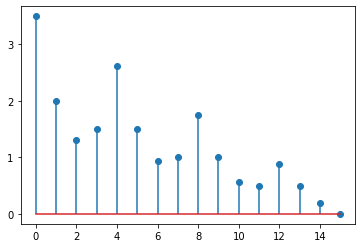

In [20]:
if __name__=="__main__":
    F0 = estimateF0(x, 10)
    
    print(F0)